
Title: Multi-layer Perceptron Regressor for Property Prediction
=======
- Created: 2019.10.04
- Updated: 2019.10.11
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents
  - http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron
  - http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- https://frhyme.github.io/python-lib/is_mlp_regressor_good/
- https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-8-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%94%A5%EB%9F%AC%EB%8B%9D/
- https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-8-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%94%A5%EB%9F%AC%EB%8B%9D/
- Optimizer: http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html


## 다층 지각(MLP)은 일련의 입력에서 일련의 출력을 생성하는 피드포워드 인공 신경 네트워크입니다. MLP는 입력 계층과 출력 계층 사이에 지시된 그래프로 연결된 여러 입력 노드의 계층이 특징입니다. MLP는 백프로포지션을 사용하여 신경망을 훈련합니다.

> class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)[source]


![MLP](https://t1.daumcdn.net/cfile/tistory/991CBB475CD7DFA02F)

HyperParameters
---


- **hidden_layer_sizes**[tuple, length = n_layers - 2, default (100,)]
  - The ith element represents the number of neurons in the ith hidden layer.

- **activation**[‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’]: Activation function for the hidden layer.
  - 뉴런은 신호의 전달유무가 아닌 전달 강도를 정하게 되었습니다. 이때 전달하는 신호의 세기를 정하는 방법이 활성함수입니다.
  
  - *‘identity’*: no-op activation, useful to implement linear bottleneck, returns f(x) = x
  - *‘logistic’*: the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    - 시그모이드 함수는 완전히 값을 전달하지 않거나(0) 혹은 완전히 전달한다(1)는 특성
    - sigmoid 함수는 뉴런의 활성화 값이 0 또는 1에 매우 가깝다면(saturate), 해당 편미분 값이 0에 매우 가까워지는 특성이 있습니다.
    - Vanishing Gradient: chain rule을 이용하는데, 이 과정에서 0에 매우 작은 값이 계속 곱해진다면 그 값은 0으로 점점 더 수렴합니다. 즉, 학습의 결과가 back propagation 과정에서 전달되지 못하고 이에 따라 weight 값의 조정이 되지 않습니다.
    - 중점이 0이 아니며, 모두 양수입니다. 이 경우 모수를 추정하는 학습이 어렵다는 단점이 있습니다.
  - *‘tanh’*: the hyperbolic tan function, returns f(x) = tanh(x).
    - 비선형 함수이지만 결과값의 범위가 -1부터 1이기 때문에 sigmoid와 달리 중심값이 0입니다. 따라서 sigmoid보다 optimazation이 빠르다는 장점이 있고, 항상 선호됩니다.
    - 하지만 여전한 vanishing gradients 문제 발생
  - *‘relu’*: the rectified linear unit function, returns f(x) = max(0, x)
    - converge되는 속도가 빠릅니다. 이것은 그래프의 형태가 선형
    - 간단한 형태이기 때문에 상대적으로 연산량이 많은 exponential을 사용하지 않음
    - “dying Relu problem”이 발생합니다. 만일 학습 과정에서 weight가 특정 뉴런이 activate되지 않도록 바뀐다면, 해당 뉴런을 지나는 gradient도 0이 됩니다. 따라서 training 과정에서 해당 뉴런이 한 번도 발현하지 않게 될 수도 있습니다.
    
    
- **solver**[{‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’]: The solver for weight optimization.
  - *lbfgs* is an optimizer in the family of quasi-Newton methods.
    - 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸립니다.
  - *sgd* refers to stochastic gradient descent.
    - ‘sgd’ 옵션일 때 영향을 미치는 매개변수 중 momentum과 nesterovs_momentum이 있습니다. 모멘텀 방식은 이전의 그래디언트를 momentum 매개변수 비율만큼 현재 계산된 그래디언트에 반영하여 갱신할 그래디언트를 구합니다. 이전의 그래디언트를 속도라고도 하며, 일정 비율의 과거 그래디언트를 모두 포함하고 있어서 마치 관성같은 효과를 준다고 볼 수 있습니다. 
    - 네스테로프 모멘텀은 모멘텀에서 구한 그래디언트를 이전 그래디언트로 가정하고 한 번 더 모멘텀 방식을 적용하여 갱신할 그래디언트를 계산합니다.
  - *adam* refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
    - Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.
    - 기본값은 ‘adam’으로 대부분의 경우에 잘 작동하지만 데이터의 스케일에 조금 민감합니다(그래서 데이터를 평균 0, 분산 1로 조정하는 게 중요합니다).

- **alpha**[float, optional, default 0.0001]: L2 penalty (regularization term) parameter.
  - regularization parameter: bigger, less overfitting
  
- **batch_size**[int, optional, default ‘auto’] = Size of minibatches for stochastic optimizers.
   - If the solver is ‘lbfgs’, the classifier will not use minibatch. 
   - When set to “auto”, batch_size=min(200, n_samples)

- **learning_rate**[{‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’]: Learning rate schedule for weight updates.
  - *‘constant’*:a constant learning rate given by ‘learning_rate_init’.
  - *‘invscaling’*: gradually decreases the learning rate learning_rate_ at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. 
  $$effective_learning_rate = \frac{learning_rate_init}{t^{power_t}}$$
  - *adaptive*: keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
  - Only used when solver=’sgd’.

- **learning_rate_init**[double, optional, default 0.001]: The initial learning rate used. It controls the step-size in updating the weights. 
  - Only used when solver=’sgd’ or ‘adam’.

- **power_t**[double, optional, default 0.5]: The exponent for inverse scaling learning rate. 
  - It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. 
  - Only used when solver=’sgd’.

- **max_iter**[int, optional, default 200]: Maximum number of iterations. 
  - The solver iterates until convergence (determined by ‘tol’) or this number of iterations. 
  - For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **shuffle**[bool, optional, default True]: Whether to shuffle samples in each iteration. 
  - Only used when solver=’sgd’ or ‘adam’.

- **random_state**[int, RandomState instance or None, optional, default None]
  - If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- **tol**[float, optional, default 1e-4]: Tolerance for the optimization. 
  - When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

- **verbose**[bool, optional, default False]: Whether to print progress messages to stdout.

- **warm_start**[bool, optional, default False]: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

- **momentum**[float, default 0.9]: Momentum for gradient descent update.
  - Should be between 0 and 1. Only used when solver=’sgd’.

- **nesterovs_momentum**[boolean, default True]: Whether to use Nesterov’s momentum. 
  - Only used when solver=’sgd’ and momentum > 0.

- **early_stopping**[bool, default False]: Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. Only effective when solver=’sgd’ or ‘adam’

- **validation_fraction**[float, optional, default 0.1]: The proportion of training data to set aside as validation set for early stopping. 
  - Must be between 0 and 1. Only used if early_stopping is True

- **beta_1**[float, optional, default 0.9]: Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’

-  **beta_2**[float, optional, default 0.999]: Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver=’adam’

- **epsilon**[float, optional, default 1e-8]: Value for numerical stability in adam. Only used when solver=’adam’

- **n_iter_no_change**[int, optional, default 10]: Maximum number of epochs to not meet tol improvement. 
  - Only effective when solver=’sgd’ or ‘adam’



Explanation of Optimizer
---


- - -
Optimizer
- - - 

- Optimization 이라는 단어는 수학적으로 많이 사용되는 단어입니다. 수리 계획 또는 수리 계획 문제라고도 하고 물리학이나 컴퓨터에서의 최적화 문제는 생각하고 있는 함수를 모델로 한 시스템의 에너지를 나타낸 것으로 여김으로써 에너지 최소화 문제라고도 부르기도 합니다. 

![optimizer](https://t1.daumcdn.net/cfile/tistory/996A04425AB85ED026)
 -> 딥러닝에서 Optimization 은 학습속도를 빠르고 안정적이게 하는 것이라고 말할 수 있습니다.
 
 - - - 
 Optimizer 발전과정
 - - - 
 ![learning equation](https://t1.daumcdn.net/cfile/tistory/999A2E4A5AB8601A24)
 - Stochastic 방법을 사용해서 기존 방법보다 빨라지기는 했지만 만족할만한 수준은 아니었습니다. 또한 Cost 의 최소점이 아닌 극소점을 찾은 뒤 더 이상 학습이 되지 않는 현상이 발생하기 시작했습니다.
 - 학습식을 보면 수정할 수 있는 부분이 Learning Rate 와 Gradient 부분이라는 것을 알 수 있습니다. 그래서 Optimizer 의 발전 과정은 어떤 부분을 수정하느냐에 따라 나누어집니다. 
 ![optimizer map](https://t1.daumcdn.net/cfile/tistory/9915A83E5AB8621703)
  - Gradient 를 수정한 Momentum, Nag  
    - Momentum: Gradient Descent를 통해 이동하는 과정에 일종의 ‘관성’을 주는 것이다. 현재 Gradient를 통해 이동하는 방향과는 별개로, 과거에 이동했던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동하는 방식이다.
      - 다음과 같이 자주 이동하는 방향에 관성이 걸리게 되고, 진동을 하더라도 중앙으로 가는 방향에 힘을 얻기 때문에 SGD에 비해 상대적으로 빠르게 이동할 수 있다
    ![avoiding local minima](http://www.yaldex.com/game-development/FILES/17fig09.gif)
    $$ v_t = \gamma V_{t-1} + \eta\triangledown_\theta J(\theta)$$
    $$ \theta = \theta - v_t $$ 
    $v_t$: time step t에서의 이동 벡터
    
    $\gamma$: 얼마나 momentum을 줄 것인지에 대한 momentum term으로서, 보통 0.9 정도의 값을 사용한다
      - 식을 살펴보면 과거에 얼마나 이동했는지에 대한 이동 항 v를 기억하고, 새로운 이동항을 구할 경우 과거에 이동했던 정도에 관성항만큼 곱해준 후 Gradient을 이용한 이동 step 항을 더해준다. 
      
    - NAG(Nesterov Accelerated Gradient): Momentum 방식에서는 이동 벡터 vt 를 계산할 때 현재 위치에서의 gradient와 momentum step을 독립적으로 계산하고 합친다. 반면, NAG에서는 momentum step을 먼저 고려하여, momentum step을 먼저 이동했다고 생각한 후 그 자리에서의 gradient를 구해서 gradient step을 이동한다. 
    ![NAG](http://cs231n.github.io/assets/nn3/nesterov.jpeg)
    $$ v_t = \gamma V_{t-1} + \eta\triangledown_\theta J(\theta - \gamma v_{t-1})$$
    $$ \theta = \theta - v_t $$ 
      - Momentum 방식의 경우 멈춰야 할 시점에서도 관성에 의해 훨씬 멀리 갈수도 있다는 단점이 존재하는 반면, NAG 방식의 경우 일단 모멘텀으로 이동을 반정도 한 후 어떤 방식으로 이동해야할 지를 결정한다. 
      - 따라서 Momentum 방식의 빠른 이동에 대한 이점은 누리면서도, 멈춰야 할 적절한 시점에서 제동을 거는 데에 훨씬 용이하다고 생각할 수 있을 것이다.
      
  - Learning Rate 를 수정한 Adagrad, RMSProp, AdaDelta 
    - Adagrad(Adaptive Gradient):변수들을 update할 때 각각의 변수마다 step size를 다르게 설정해서 이동하는 방식
      -  ‘지금까지 많이 변화하지 않은 변수들은 step size를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게 하자’ => 주 등장하거나 변화를 많이 한 변수들의 경우 optimum에 가까이 있을 확률이 높기 때문에 작은 크기로 이동하면서 세밀한 값을 조정하고, 적게 변화한 변수들은 optimum 값에 도달하기 위해서는 많이 이동해야할 확률이 높기 때문에 먼저 빠르게 loss 값을 줄이는 방향으로 이동하려는 방식
      - word representation을 학습시킬 경우 단어의 등장 확률에 따라 variable의 사용 비율이 확연하게 차이나기 때문에 Good!
      $$ G_t = G_{t-1} + (\triangledown_\theta J(\theta_t))^2 $$
      $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t+\epsilon}} \cdot \triangledown_\theta J(\theta_t)$$
      - Neural Network의 parameter가 k개라고 할 때, Gt는 k차원 벡터로서 ‘time step t까지 각 변수가 이동한 gradient의 sum of squares’ 를 저장한다.
      - θ 를 업데이트하는 상황에서는 기존 step size η에 Gt의 루트값에 반비례한 크기로 이동을 진행하여, 지금까지 많이 변화한 변수일 수록 적게 이동하고 적게 변화한 변수일 수록 많이 이동하도록 한다. 
      - ϵ 은 10−4 ~ 10−8 정도의 작은 값으로서 0으로 나누는 것을 방지하기 위한 작은 값이다.
      - Adagrad를 사용하면 학습을 진행하면서 굳이 step size decay등을 신경써주지 않아도 된다는 장점이 있다. 보통 adagrad에서 step size로는 0.01 정도를 사용한 뒤, 그 이후로는 바꾸지 않는다.
      - 반면, Adagrad에는 학습을 계속 진행하면 step size가 너무 줄어든다는 문제점이 있다. G에는 계속 제곱한 값을 넣어주기 때문에 G의 값들은 계속해서 증가하기 때문에, 학습이 오래 진행될 경우 step size가 너무 작아져서 결국 거의 움직이지 않게 된다. 
      
    - RMSProp:  Adagrad의 식에서 gradient의 제곱값을 더해나가면서 구한 Gt 부분을 지수평균으로 바꾸어서 대체한 방법이다. 
     $$ G = \gamma G + (1-\gamma)(\triangledown_\theta J(\theta_t))^2 $$
      $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G+\epsilon}} \cdot \triangledown_\theta J(\theta_t)$$
    
    - Adadelta(Adaptive Delta): RMSProp과 동일하게 G를 구할 때 합을 구하는 대신 지수평균을 구한다. 다만, 여기에서는 step size를 단순하게 η 로 사용하는 대신 step size의 변화값의 제곱을 가지고 지수평균 값을 사용한다.
     $$ G = \gamma G + (1-\gamma)(\triangledown_\theta J(\theta_t))^2 $$
      $$\theta_{t+1} = \theta_t - \frac{\sqrt{s+\epsilon}}{\sqrt{G+\epsilon}} \cdot \triangledown_\theta J(\theta_t)$$
      $$ \theta = \theta - \triangle_\theta$$
      $$ s = \gamma s + (1-\gamma)\triangle^2_\theta$$
      - Gradient Descent와 같은 first-order optimization 대신 Second-order optimization을 approximate 하기 위한 방법
    
  - 이 두 종류의 장점을 합한 Adam, Nadam 으로 구성됩니다.
    - Adam(Adaptive Moment Estimation): RMSProp과 Momentum 방식을 합친 것 같은 알고리즘
      - 지금까지 계산해온 기울기의 지수평균을 저장하며, RMSProp과 유사하게 기울기의 제곱값의 지수평균을 저장
      $$ m_t = \beta_1 m_{t-1} + (1-\beta_1)\triangledown_\theta J(\theta) $$
      $$ v_t = \beta_2 v_{t-1} + (1-\beta_2)(\triangledown_\theta J(\theta))^2 $$
      - m과 v가 처음에 0으로 초기화되어 있기 때문에 학습의 초반부에서는 mt,vt가 0에 가깝게 bias 되어있을 것이라고 판단하여 이를 unbiased 하게 만들어주는 작업을 거친다.
      - 보통 β1 로는 0.9, β2로는 0.999, ϵ 으로는 10−8 정도의 값을 사용한다고 한다.
      
      
※  여기서 설명한 알고리즘들은 모두 Stochastic Gradient Descent, 즉 단순한 first-order optimization의 변형들이다. 이 외에도 Newton’s Method 등 second-order optimization을 기반으로 한 알고리즘들도 있다. 그러나 단순한 second-order optimization을 사용하기 위해서는 Hessian Matrix라는 2차 편미분 행렬을 계산한 후 역행렬을 구해야 하는데, 이 계산과정이 계산적으로 비싼 작업이기 때문에 보통 잘 사용되지 않는다. 이러한 계산량을 줄이기 위해 hessian matrix를 근사하거나 추정해나가면서 계산을 진행하는 BFGS / L-BFGS 등의 알고리즘, 그리고 hessian matrix를 직접 계산하지 않으면서 second-order optimization인 Hessian-Free Optimization 등도 존재한다.
  
 



출처: https://gomguard.tistory.com/187

Attributes
---

- **loss_**[float]: The current loss computed with the loss function.

- **coefs_**[list, length n_layers - 1]: The ith element in the list represents the weight matrix corresponding to layer i.

- **intercepts_**[list, length n_layers - 1]: The ith element in the list represents the bias vector corresponding to layer i + 1.

- **n_iter_**[int]: The number of iterations the solver has ran.

- **n_layers_**[int]: Number of layers.

- **n_outputs_**[int]: Number of outputs.

- **out_activation_**[string]: Name of the output activation function.

Method
---



- fit(self, X, y)	Fit the model to data matrix X and target(s) y.
- get_params(self[, deep])	Get parameters for this estimator.
- predict(self, X)	Predict using the multi-layer perceptron model.
- score(self, X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
- set_params(self, \*\*params)	Set the parameters of this estimator.

Setup
---

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.21.3'

Get the data
============

In [3]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length30235 bytes


In [4]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),2k_RE,2k_IM,2k_time,2k_voltage,5k_RE,5k_IM,5k_time,5k_voltage
0,0.000000,0.000000,2.247535,7.353994,-0.617027,412.0,8.101315,-0.001526,0.0,5.336142,8.103753,0.048710,0.0,5.330770
1,75.892467,7.832161,2.249186,7.330924,-0.934697,412.0,8.132672,0.148338,3.2,5.338889,8.084683,0.057399,3.2,5.329357
2,161.088251,7.825444,2.248753,7.367316,-0.574723,412.0,8.101563,0.136901,6.4,5.337461,8.099559,0.125401,6.4,5.331381
3,177.021266,7.813692,2.249833,7.345533,-0.862965,412.0,8.110379,0.107394,9.6,5.335226,8.103011,0.153286,9.6,5.329095
4,182.120781,7.780144,2.247326,7.350974,-0.681030,412.0,8.107994,0.299747,12.8,5.336309,8.122078,0.185302,12.8,5.333564


In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
2k_RE           210 non-null float64
2k_IM           210 non-null float64
2k_time         210 non-null float64
2k_voltage      210 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(14)
memory usage: 23.0 KB


2 Variable (1k_RE & 1k_IM) data
---

In [7]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


In [8]:
df.describe()

,yield stress,elongation,1k_RE,1k_IM
count,190.000000,190.000000,190.000000,190.000000
mean,329.165639,5.071727,7.184671,-0.994367
std,66.792374,1.598025,0.078204,0.122292
min,0.000000,0.000000,7.076378,-1.220670
25%,294.251701,3.747314,7.121649,-1.065305
50%,346.269052,5.080847,7.162842,-1.015719
75%,380.555745,6.401437,7.245272,-0.922856
max,406.890446,7.832161,7.367316,-0.574723


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e5c3c668>,
      dtype=object)

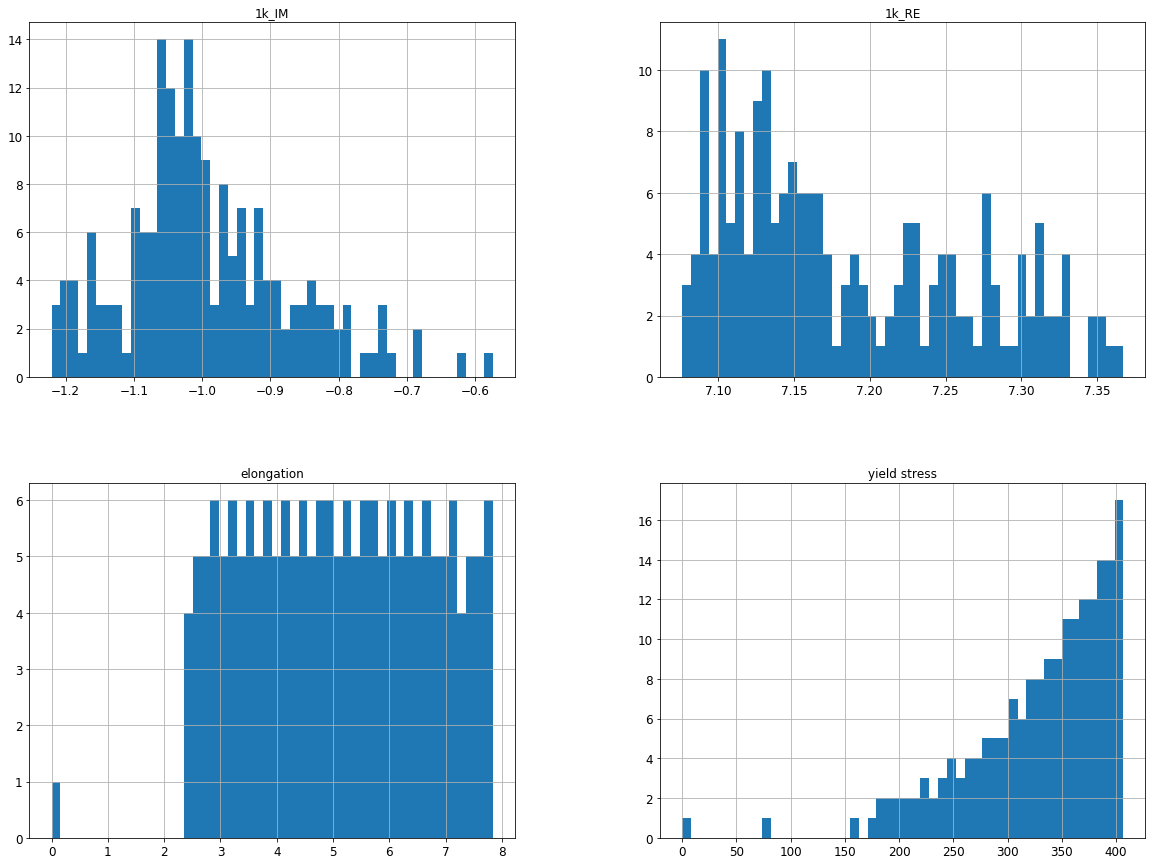

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [12]:
len(X_test)

39

In [0]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [14]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 35 to 102
Data columns (total 2 columns):
1k_RE    151 non-null float64
1k_IM    151 non-null float64
dtypes: float64(2)
memory usage: 3.6 KB


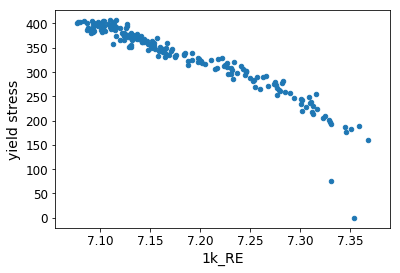

In [16]:
df_copy.plot(kind="scatter", x="1k_RE", y="yield stress")

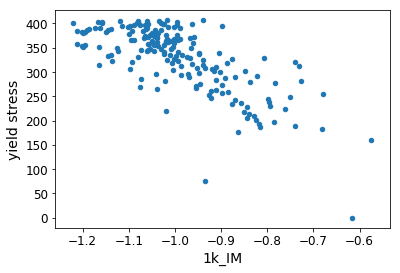

In [17]:
df_copy.plot(kind="scatter", x="1k_IM", y="yield stress")

In [18]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_RE,1k_IM
yield stress,1.000000,-0.776652,-0.947305,-0.726706
elongation,-0.776652,1.000000,0.883247,0.591942
1k_RE,-0.947305,0.883247,1.000000,0.816920
1k_IM,-0.726706,0.591942,0.816920,1.000000


In [19]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
1k_IM          -0.726706
elongation     -0.776652
1k_RE          -0.947305
Name: yield stress, dtype: float64

In [20]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_RE           0.883247
1k_IM           0.591942
yield stress   -0.776652
Name: elongation, dtype: float64

In [21]:
print(X_train)

        1k_RE     1k_IM
35   7.275967 -0.897505
100  7.130577 -1.163829
55   7.242638 -0.918922
135  7.127862 -0.995553
78   7.174594 -0.974959
95   7.171711 -1.029776
29   7.279347 -0.921136
142  7.130945 -1.037556
51   7.245305 -0.903072
162  7.102419 -1.101962
183  7.079194 -1.157279
31   7.259413 -1.038934
154  7.092637 -1.137819
12   7.312785 -0.839329
41   7.253217 -0.910868
124  7.138559 -1.003155
56   7.214248 -1.096842
119  7.123448 -1.094453
117  7.141808 -1.019309
26   7.315852 -0.679348
38   7.274650 -0.838035
118  7.151657 -1.049820
170  7.092730 -1.076187
104  7.129160 -1.201569
82   7.183574 -0.985725
127  7.134200 -1.039855
2    7.367316 -0.574723
46   7.266073 -0.823381
97   7.162874 -1.008984
109  7.147599 -1.058126
..        ...       ...
58   7.230624 -0.953280
48   7.230754 -0.972286
88   7.163089 -1.024522
21   7.301144 -0.869038
57   7.216858 -0.935602
160  7.087531 -1.163459
184  7.103697 -1.033858
129  7.127348 -1.057862
37   7.281512 -0.782862
157  7.125413 -0

## Feature Scaling

In [22]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)


el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[ 0.89538224],
       [-0.04939316],
       [ 0.95271802],
       [-0.20325483],
       [-0.31581744],
       [-1.73115607],
       [-2.08291738],
       [-1.67897124],
       [ 0.64741109],
       [ 0.61557252],
       [ 0.76539935],
       [ 0.93371604],
       [-1.58063649],
       [ 0.98070605],
       [ 0.46420779],
       [ 1.15411996],
       [ 0.92399393],
       [-0.22081126],
       [ 1.01711315],
       [-0.73212955],
       [-1.09706837],
       [-1.31957121],
       [-0.18504944],
       [ 0.28797548],
       [-0.15007426],
       [ 0.47643691],
       [ 0.26035688],
       [-1.53377299],
       [-0.65327667],
       [-0.0335396 ],
       [ 1.05256465],
       [-0.16704042],
       [-2.34232342],
       [ 0.69149062],
       [ 0.17759992],
       [ 1.00851225],
       [ 0.41618542],
       [ 1.16161328],
       [ 1.19372827]])

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")
#np.savetxt("x_train_std.csv", X_train_std, delimiter=",")

In [25]:
X_train_std.shape

(152, 2)

In [26]:
ys_train.shape

(152, 1)

In [27]:
X_train_std

array([[ 1.18626371e+00,  8.37770652e-01],
       [-6.96707052e-01, -1.41401368e+00],
       [ 7.54613774e-01,  6.56693341e-01],
       [-7.31863396e-01,  8.77272063e-03],
       [-1.26631552e-01,  1.82890808e-01],
       [-1.63971175e-01, -2.80585647e-01],
       [ 1.23004397e+00,  6.37970329e-01],
       [-6.91930668e-01, -3.46365877e-01],
       [ 7.89164082e-01,  7.90704777e-01],
       [-1.06137904e+00, -8.90924776e-01],
       [-1.36217480e+00, -1.35863561e+00],
       [ 9.71869593e-01, -3.58017145e-01],
       [-1.18806689e+00, -1.19409705e+00],
       [ 1.66310642e+00,  1.32965954e+00],
       [ 8.91623619e-01,  7.24791844e-01],
       [-5.93320420e-01, -5.55011356e-02],
       [ 3.86939760e-01, -8.47636511e-01],
       [-7.89031033e-01, -8.27434697e-01],
       [-5.51244549e-01, -1.92088225e-01],
       [ 1.70282512e+00,  2.68230903e+00],
       [ 1.16920774e+00,  1.34060238e+00],
       [-4.23696217e-01, -4.50058894e-01],
       [-1.18686150e+00, -6.72996001e-01],
       [-7.

In [0]:
np.random.seed(42)

Select and train a MLP regression model
===

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/MLP_Regression/yield stress_2V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [30]:
# Normal Random Forest

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
mlp_reg = MLPRegressor(random_state=42)
mlp_reg.fit(X_train_std, ys_train_std)
ys_predictions_mlp= mlp_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
mlp_mse = mean_squared_error(ys_train, ys_predictions_mlp)
mlp_rmse = np.sqrt(mlp_mse)
mlp_rmse


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.682377029633376

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [31]:
ys_train

array([[273.3904667 ],
       [350.7724668 ],
       [305.2761365 ],
       [376.219849  ],
       [331.2731424 ],
       [346.6789108 ],
       [261.0940842 ],
       [380.7116965 ],
       [299.7695692 ],
       [392.7784793 ],
       [403.9912956 ],
       [265.3309169 ],
       [388.0935933 ],
       [213.5049508 ],
       [284.2355762 ],
       [368.7684819 ],
       [306.5893409 ],
       [365.2966366 ],
       [363.8093514 ],
       [254.2909124 ],
       [278.9672283 ],
       [364.5557704 ],
       [397.1748847 ],
       [354.0550831 ],
       [335.0715091 ],
       [370.8627499 ],
       [161.0882509 ],
       [292.3324414 ],
       [348.3210261 ],
       [357.9091233 ],
       [368.0616517 ],
       [275.2899157 ],
       [359.4348317 ],
       [244.3682141 ],
       [406.8904463 ],
       [380.087891  ],
       [367.4049917 ],
       [209.7944582 ],
       [361.6173138 ],
       [400.3926709 ],
       [189.932155  ],
       [256.5907645 ],
       [351.607539  ],
       [182

In [32]:
X_train_std

array([[ 1.18626371e+00,  8.37770652e-01],
       [-6.96707052e-01, -1.41401368e+00],
       [ 7.54613774e-01,  6.56693341e-01],
       [-7.31863396e-01,  8.77272063e-03],
       [-1.26631552e-01,  1.82890808e-01],
       [-1.63971175e-01, -2.80585647e-01],
       [ 1.23004397e+00,  6.37970329e-01],
       [-6.91930668e-01, -3.46365877e-01],
       [ 7.89164082e-01,  7.90704777e-01],
       [-1.06137904e+00, -8.90924776e-01],
       [-1.36217480e+00, -1.35863561e+00],
       [ 9.71869593e-01, -3.58017145e-01],
       [-1.18806689e+00, -1.19409705e+00],
       [ 1.66310642e+00,  1.32965954e+00],
       [ 8.91623619e-01,  7.24791844e-01],
       [-5.93320420e-01, -5.55011356e-02],
       [ 3.86939760e-01, -8.47636511e-01],
       [-7.89031033e-01, -8.27434697e-01],
       [-5.51244549e-01, -1.92088225e-01],
       [ 1.70282512e+00,  2.68230903e+00],
       [ 1.16920774e+00,  1.34060238e+00],
       [-4.23696217e-01, -4.50058894e-01],
       [-1.18686150e+00, -6.72996001e-01],
       [-7.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  
    #solver adam
    {'hidden_layer_sizes': [ (50,50,50,50,50),(50,50,50,50,50,50)], 'activation': ['identity'], 
     'solver': ['adam'], 'alpha': [0.0001, 0.0005,0.001 ], 
     'learning_rate': ['constant', 'invscaling','adaptive'], 
     'max_iter': [500,1000], 'random_state': [42],
    'early_stopping': [True], 'beta_1': [0.5, 0.7],
     'n_iter_no_change': [20,30,40,50,70,90,100]
    }
  ]

rf_reg = MLPRegressor(random_state=42)

grid_search = GridSearchCV(rf_reg, param_grid, cv=30,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
grid_search.best_estimator_

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.5,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
grid_search.best_params_

{'activation': 'identity',
 'alpha': 0.0001,
 'beta_1': 0.5,
 'early_stopping': True,
 'hidden_layer_sizes': (50, 50, 50, 50, 50),
 'learning_rate': 'constant',
 'max_iter': 500,
 'n_iter_no_change': 20,
 'random_state': 42,
 'solver': 'adam'}

In [36]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3453315451489461 {'activation': 'identity', 'alpha': 0.0001, 'beta_1': 0.5, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50, 50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'n_iter_no_change': 20, 'random_state': 42, 'solver': 'adam'}
0.3453315451489461 {'activation': 'identity', 'alpha': 0.0001, 'beta_1': 0.5, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50, 50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'n_iter_no_change': 30, 'random_state': 42, 'solver': 'adam'}
0.3453315451489461 {'activation': 'identity', 'alpha': 0.0001, 'beta_1': 0.5, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50, 50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'n_iter_no_change': 40, 'random_state': 42, 'solver': 'adam'}
0.3453315451489461 {'activation': 'identity', 'alpha': 0.0001, 'beta_1': 0.5, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50, 50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'n_iter_no_change': 50, 'random_state': 42, 's

In [37]:
  """
  #solver lbfgs
    {'hidden_layer_sizes': [ (100,)], 'activation': ['identity', 'relu'], 
     'solver': ['lbfgs'], 'alpha': [0.0001, 0.0005,0.001, 0.005, 0.01, 0.05 ], 
     'learning_rate': ['constant', 'invscaling','adaptive'], 
     'max_iter': [100, 200, 300, 400, 500], 'random_state': [42],
      'early_stopping': [True],
    
    },
    
    #solver sgd
    {'hidden_layer_sizes': [ (100,)], 'activation': ['identity', 'relu'], 
     'solver': ['sgd'], 'alpha': [0.0001, 0.0005,0.001, 0.005, 0.01, 0.05 ], 
     'learning_rate': ['constant', 'invscaling','adaptive'],  'power_t': [0.1, 0.3, 0.5, 0.7], 
     'max_iter': [100, 200, 300, 400, 500], 'random_state': [42], 'momentum': [0.5, 0.7, 0.9],
     'nesterovs_momentum': [True], 'early_stopping': [True], 
     'n_iter_no_change': [5, 10, 15, 20, 25], 'learning_rate_init': [0.0001, 0.0005, 0.001]
    },
    """

"\n#solver lbfgs\n  {'hidden_layer_sizes': [ (100,)], 'activation': ['identity', 'relu'], \n   'solver': ['lbfgs'], 'alpha': [0.0001, 0.0005,0.001, 0.005, 0.01, 0.05 ], \n   'learning_rate': ['constant', 'invscaling','adaptive'], \n   'max_iter': [100, 200, 300, 400, 500], 'random_state': [42],\n    'early_stopping': [True],\n  \n  },\n  \n  #solver sgd\n  {'hidden_layer_sizes': [ (100,)], 'activation': ['identity', 'relu'], \n   'solver': ['sgd'], 'alpha': [0.0001, 0.0005,0.001, 0.005, 0.01, 0.05 ], \n   'learning_rate': ['constant', 'invscaling','adaptive'],  'power_t': [0.1, 0.3, 0.5, 0.7], \n   'max_iter': [100, 200, 300, 400, 500], 'random_state': [42], 'momentum': [0.5, 0.7, 0.9],\n   'nesterovs_momentum': [True], 'early_stopping': [True], \n   'n_iter_no_change': [5, 10, 15, 20, 25], 'learning_rate_init': [0.0001, 0.0005, 0.001]\n  },\n  "

In [0]:
ys_mlp_final_model = grid_search.best_estimator_

In [0]:
X_test_std = np.array(X_test_std)
#X_test_std= X_test_std.reshape(-1, 1)
#X_test_std

In [40]:
ys_mlp_train_predictions = ys_mlp_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_mlp_train_mse = mean_squared_error(ys_train, ys_mlp_train_predictions)
ys_mlp_train_rmse = np.sqrt(ys_mlp_train_mse)
ys_mlp_train_rmse

22.36956156103923

In [41]:
ys_mlp_test_predictions = ys_mlp_final_model.predict(X_test_std) * np.std(ys_test) + np.mean(ys_test)
ys_mlp_test_mse = mean_squared_error(ys_test,ys_mlp_test_predictions)
ys_mlp_test_rmse = np.sqrt(ys_mlp_test_mse)
ys_mlp_test_rmse

11.660434757162248

## Central Limit Theorm

In [42]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(504,)
Combinations


In [44]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.13583436 -0.14572137 -0.14555211 -0.14555211 -0.14555211 -0.14562101
 -0.14571422 -0.13583436 -0.14572137 -0.14555211 -0.14555211 -0.14555211
 -0.14562101 -0.14571422 -0.13583436 -0.14572137 -0.14555211 -0.14555211
 -0.14555211 -0.14562101 -0.14571422 -0.13583436 -0.14572137 -0.14555211
 -0.14555211 -0.14555211 -0.14562101 -0.14571422 -0.13583436 -0.14572137
 -0.14555211 -0.14555211 -0.14555211 -0.14562101 -0.14571422 -0.13583436
 -0.14572137 -0.14555211 -0.14555211 -0.14555211 -0

In [45]:
mean_train_score =cvres['mean_train_score']
print(mean_test_score)

[-0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388 -0.11925388
 -0.13583436 -0.14572137 -0.14555211 -0.14555211 -0.14555211 -0.14562101
 -0.14571422 -0.13583436 -0.14572137 -0.14555211 -0.14555211 -0.14555211
 -0.14562101 -0.14571422 -0.13583436 -0.14572137 -0.14555211 -0.14555211
 -0.14555211 -0.14562101 -0.14571422 -0.13583436 -0.14572137 -0.14555211
 -0.14555211 -0.14555211 -0.14562101 -0.14571422 -0.13583436 -0.14572137
 -0.14555211 -0.14555211 -0.14555211 -0.14562101 -0.14571422 -0.13583436
 -0.14572137 -0.14555211 -0.14555211 -0.14555211 -0

In [46]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026 0.35575026
 0.43535386 0.48116003 0.48119922 0.48119922 0.48119922 0.4811945
 0.48062359 0.43535386 0.48116003 0.48119922 0.48119922 0.48119922
 0.4811945  0.48062359 0.43535386 0.48116003 0.48119922 0.48119922
 0.48119922 0.4811945  0.48062359 0.43535386 0.48116003 0.48119922
 0.48119922 0.48119922 0.4811945  0.48062359 0.43535386 0.48116003
 0.48119922 0.48119922 0.48119922 0.4811945  0.48062359 0.43535386
 0.48116003 0.48119922 0.48119922 0.48119922 0.4811945  0.48062359
 0.39587295 0.39587295 0.39587295 0.39587295 0.39587295 0.39587

In [47]:
std_train_score =cvres['std_train_score']
print(std_train_score)

[0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519 0.01101519
 0.01572066 0.01781624 0.01768037 0.01768037 0.01768037 0.01763828
 0.01770263 0.01572066 0.01781624 0.01768037 0.01768037 0.01768037
 0.01763828 0.01770263 0.01572066 0.01781624 0.01768037 0.01768037
 0.01768037 0.01763828 0.01770263 0.01572066 0.01781624 0.01768037
 0.01768037 0.01768037 0.01763828 0.01770263 0.01572066 0.01781624
 0.01768037 0.01768037 0.01768037 0.01763828 0.01770263 0.01572066
 0.01781624 0.01768037 0.01768037 0.01768037 0.01763828 0.01770263
 0.01358516 0.01358516 0.01358516 0.01358516 0.01358516 0.0135

In [48]:
with open('/content/gdrive/My Drive/validation/cvscores/MLP/yield_stress/MLP_2V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")

!cat /content/gdrive/My Drive/validation/cvscores/MLP/yield_stress/MLP_2V.txt


cat: /content/gdrive/My: No such file or directory
cat: Drive/validation/cvscores/MLP/yield_stress/MLP_2V.txt: No such file or directory


Train data plotting
---

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/MLP_Regression/yield_stress_2V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Saving figure TrainPrediction_with_2V_MLP_ParamFitted


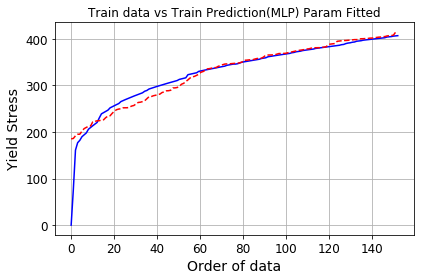

In [50]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_mlp_train_predictions_sort= np.sort(ys_mlp_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_mlp_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(MLP) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_2V_MLP_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_2V_MLP_ParamFitted


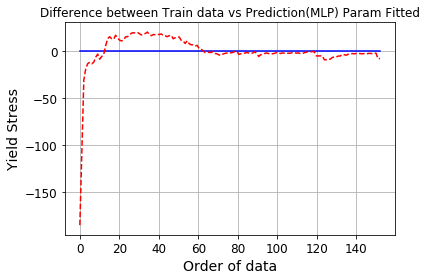

In [51]:
# Difference of train data
difference = ys_train_sort - ys_mlp_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(MLP) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_2V_MLP_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_2V_MLP_ParamFitted


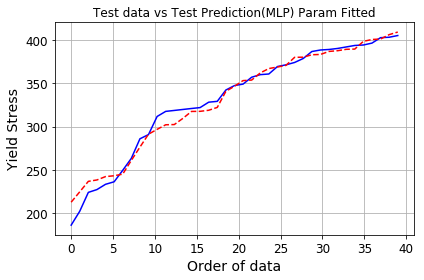

In [52]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_mlp_test_predictions_sort= np.sort(ys_mlp_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_mlp_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(MLP) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_2V_MLP_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_2V_MLP_ParamFitted


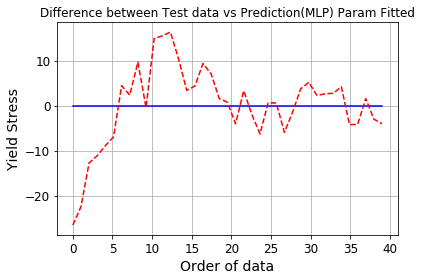

In [54]:
# Difference of train data
difference = ys_test_sort - ys_mlp_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(MLP) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_2V_MLP_ParamFitted")


## Extracting files

In [61]:
!ls images/BestHyperParameter/MLP_Regression/yield_stress_2V/


Difference_between_Test_data_vs_Prediction_2V_MLP_ParamFitted.png
Difference_between_Train_data_vs_Prediction_2V_MLP_ParamFitted.png
TestPrediction_with_2V_MLP_ParamFitted.png
TrainPrediction_with_2V_MLP_ParamFitted.png


In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM fiels to local
files.download('images/BestHyperParameter/MLP_Regression/yield_stress_2V/TrainPrediction_with_2V_MLP_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/MLP_Regression/yield_stress_2V/TestPrediction_with_2V_MLP_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/MLP_Regression/yield_stress_2V/Difference_between_Train_data_vs_Prediction_2V_MLP_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/MLP_Regression/yield_stress_2V/Difference_between_Test_data_vs_Prediction_2V_MLP_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/MLP/yield_stress/MLP_2V.txt')

#### elongation